1. Add One More Hidden Layer to Autoencoder

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import regularizers

# Load data
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), -1))  # Flatten
x_test = x_test.reshape((len(x_test), -1))

# Define Autoencoder with an extra hidden layer
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)  # Extra hidden layer
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train
history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.0079 - loss: 0.3428 - val_accuracy: 0.0089 - val_loss: 0.1647
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0100 - loss: 0.1571 - val_accuracy: 0.0123 - val_loss: 0.1357
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.0109 - loss: 0.1335 - val_accuracy: 0.0102 - val_loss: 0.1239
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.0103 - loss: 0.1232 - val_accuracy: 0.0103 - val_loss: 0.1171
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0091 - loss: 0.1170 - val_accuracy: 0.0092 - val_loss: 0.1113
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0097 - loss: 0.1114 - val_accuracy: 0.0096 - val_loss: 0.1071
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0098 - loss: 0.1075 - val_accuracy: 0.0095 - val_loss: 0.1045
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 10m

2. Predict & Visualize Original vs Reconstructed Image

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


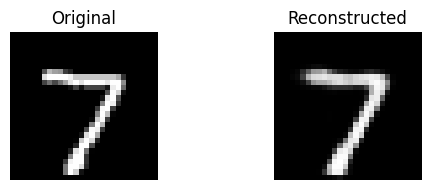

In [2]:
# Predict
decoded_imgs = autoencoder.predict(x_test)

# Visualize
n = 1  # Show 1 example
plt.figure(figsize=(6, 2))
for i in range(n):
    # Original
    ax = plt.subplot(1, 2, 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed
    ax = plt.subplot(1, 2, 2)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.tight_layout()
plt.show()


3. Repeat with Denoising Autoencoder

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0115 - loss: 0.1646 - val_accuracy: 0.0110 - val_loss: 0.1303
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.0113 - loss: 0.1296 - val_accuracy: 0.0131 - val_loss: 0.1246
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0109 - loss: 0.1247 - val_accuracy: 0.0141 - val_loss: 0.1221
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0115 - loss: 0.1224 - val_accuracy: 0.0115 - val_loss: 0.1208
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.0115 - loss: 0.1211 - val_accuracy: 0.0115 - val_loss: 0.1202
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.0110 - loss: 0.1200 - val_accuracy: 0.0120 - val_loss: 0.1196
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0115 - loss: 0.1192 - val_accuracy: 0.0109 - val_loss: 0.1205
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0118 - loss: 0.1188 - val_accu

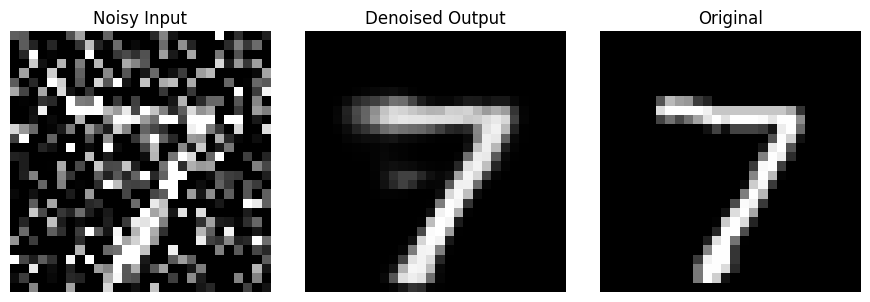

In [3]:
# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Denoising Autoencoder (reuse same architecture)
denoising_autoencoder = Model(input_img, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train on noisy data
history_denoise = denoising_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

# Predict and visualize
decoded_denoised_imgs = denoising_autoencoder.predict(x_test_noisy)

plt.figure(figsize=(9, 3))
# Noisy
ax = plt.subplot(1, 3, 1)
plt.imshow(x_test_noisy[0].reshape(28, 28), cmap='gray')
plt.title("Noisy Input")
plt.axis('off')

# Denoised
ax = plt.subplot(1, 3, 2)
plt.imshow(decoded_denoised_imgs[0].reshape(28, 28), cmap='gray')
plt.title("Denoised Output")
plt.axis('off')

# Original
ax = plt.subplot(1, 3, 3)
plt.imshow(x_test[0].reshape(28, 28), cmap='gray')
plt.title("Original")
plt.axis('off')
plt.tight_layout()
plt.show()


4. Plot Loss and Accuracy

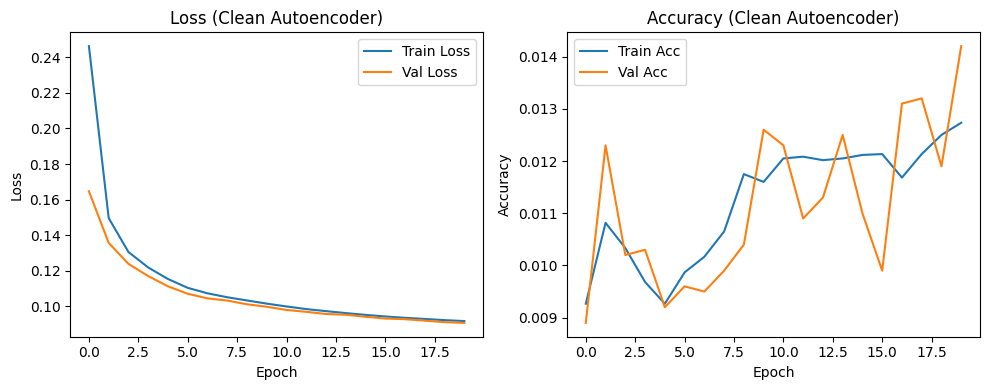

In [4]:
# Plot training loss and accuracy
plt.figure(figsize=(10, 4))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss (Clean Autoencoder)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy (Clean Autoencoder)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
